In [80]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import cross_validation
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter

The problem with the above data is it has categorical lablels which is unsuitable for machine learning algorithms. You need to convert them to unique numerical values for machine learning. Lets do it with pandas in python First we will import the csv into pandas

In [57]:
df=pd.read_csv("car.data.csv")

In [58]:
df.head()

,buying,maintainance,doors,persons,lug_boot,saftey,classs
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [59]:
df.tail()

,buying,maintainance,doors,persons,lug_boot,saftey,classs
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying          1728 non-null object
maintainance    1728 non-null object
doors           1728 non-null object
persons         1728 non-null object
lug_boot        1728 non-null object
saftey          1728 non-null object
classs          1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


As you can see from the summary, all are string objects, we want them to be converted to numeric unqiue values. 
In pandas you can use factorize() function to encode the labels columnwise or a simple replace() will work.

In [99]:
#Lets encode the labels in the dataset
df = df.replace('vhigh',4)
df = df.replace('high',3)
df = df.replace('med',2)
df = df.replace('low',1)

df = df.replace('small',1)
df = df.replace('med',2)
df = df.replace('big',3)

df = df.replace('unacc',1)
df = df.replace('acc',2)
df = df.replace('good',3)
df = df.replace('vgood',4)

df=df.replace('more',5)
df=df.replace('5more',6)

After encoding we see the dataset like this..

In [62]:
df.head()

,buying,maintainance,doors,persons,lug_boot,saftey,classs
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1


In [63]:
df.tail()

,buying,maintainance,doors,persons,lug_boot,saftey,classs
1723,1,1,6,5,2,2,3
1724,1,1,6,5,2,3,4
1725,1,1,6,5,3,1,1
1726,1,1,6,5,3,2,3
1727,1,1,6,5,3,3,4


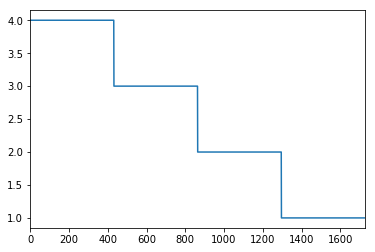

In [64]:
df['buying'].plot()

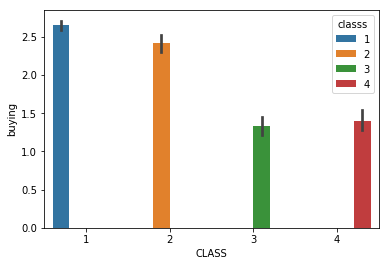

In [98]:
sns.barplot("classs","buying",  data=df, hue="classs")  
plt.xlabel('CLASS')

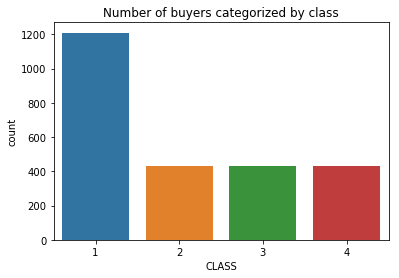

In [65]:
sns.countplot(df.buying)
sns.countplot(df.classs)
plt.xlabel('CLASS')
plt.title('Number of buyers categorized by class')

Now that our data is numeric, we make setup things for machine learning.
we convert from pandas to numpy

In [66]:
car = df.values

we split the data to X,y which is attributes(X) and output class (y)

In [67]:
X,y = car[:,:6], car[:,6]

This selects all rows then X holds first 6 column attributes and y the last column as class (1d array)
 &
We make sure that all the values in numpy are int to avoid potential numpy problems

In [68]:
X,y = X.astype(int), y.astype(int)

Lets split our data for 70% training and 30% testing.

In [78]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.3,random_state=0)

we're all set to apply for applying machine learning algorithms.

 let's setup the RandomForestClassifier()

In [81]:
clf = ensemble.RandomForestClassifier(n_estimators=500)

In [82]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [83]:
clf.score(X_test,y_test)

0.97687861271676302

Thats a pretty good accuracy score

In [84]:
y_pred = clf.predict(X_test)

In [89]:
y_pred

array([2, 1, 1, 1, 1, 4, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 4, 2, 3,
       1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 3, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 3, 1, 1, 1, 2,
       1, 1, 1, 4, 1, 2, 2, 1, 1, 1, 2, 1, 4, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 4, 1, 1, 1, 4, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 3,
       2, 4, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 4, 1, 2, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1,